In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [4]:
df.shape


(13320, 9)

In [5]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [7]:
df = df.drop(['area_type' , 'availability' , 'society'] , axis = 'columns')

In [8]:
df.shape

(13320, 6)

### First we fill tha NAN values foe the Data cleaning 

In [9]:
df.isna().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [10]:
balcony_median = df.balcony.median()
df['balcony'] = df['balcony'].fillna(balcony_median)

In [11]:
df['location'].dropna(axis = 0)


0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13319, dtype: object

In [12]:
df.location.isna().sum()

1

In [13]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [14]:
import math
bath_na = math.ceil(df['bath'].mean())
df['bath'] = df['bath'].fillna(bath_na)

In [15]:
df = df.dropna()

In [16]:
df.shape

(13303, 6)

### now we convert the location in the numbers

In [17]:
# df['size'][0][0]
df['size'] = [float(x.split(' ')[0]) for x in df['size']]

In [18]:
#  here the outlier og badrooms which have the values like >20
df['size'].unique()

array([ 2.,  4.,  3.,  6.,  1.,  8.,  7.,  5., 11.,  9., 27., 10., 19.,
       16., 43., 14., 12., 13., 18.])

In [19]:
#  now we check the total_sqft in 
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
#  here we found the some typically range of total_Sqft so we have to tackle this so firstly we try to conver the normal 
#    number in float and the if we have some unexpected range then we need to average of it 
def convert_float(x):
    tockenize = x.split('-')
    if len(tockenize) == 2:
        return float(float(tockenize[0]) + float(tockenize[1]))/2
    try:
        return float(x)
    except:
        return None


In [21]:
df['total_sqft'] = df['total_sqft'].apply(convert_float)


In [22]:
df.sample(4)

,location,size,total_sqft,bath,balcony,price
9827,Chandapura,2.0,750.0,1.0,1.0,18.5
7410,Bommasandra,2.0,800.0,1.0,1.0,32.0
10309,Ramamurthy Nagar,4.0,1900.0,4.0,2.0,185.0
4827,Doddathoguru,1.0,750.0,1.0,1.0,25.5


### Feature Engineering

In [23]:
#  now we add 1 column which shows price per sqft 
df['price_per_sqft'] = df['price']*100000 / df['total_sqft']
df.head()

,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3699.810606
1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.384615
2,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.555556
3,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.890861
4,Kothanur,2.0,1200.0,2.0,1.0,51.00,4250.000000


In [24]:
len(df.location.unique())

1304

### now we look at the location column it is categorical data we have to classify this 
### lets see the numbers of unique location 

In [25]:
location_stst = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stst

location
Whitefield             539
Sarjapur  Road         397
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [26]:
len(location_stst[location_stst <=10])

1063

In [27]:
location_less10 = location_stst[location_stst <=10]
location_less10

location
Dodsworth Layout         10
1st Block Koramangala    10
Nagappa Reddy Layout     10
Ganga Nagar              10
Dairy Circle             10
                         ..
 Banaswadi                1
Kanakadasa Layout         1
Kanakapur main road       1
Kanakapura  Rod           1
whitefiled                1
Name: location, Length: 1063, dtype: int64

In [28]:
#  so we can put that all location to as other categary
df['location'] = df.location.apply(lambda x : 'other' if x in location_less10 else x )
df.head(10)

,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3699.810606
1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.384615
2,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.555556
3,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.890861
4,Kothanur,2.0,1200.0,2.0,1.0,51.00,4250.000000
5,Whitefield,2.0,1170.0,2.0,1.0,38.00,3247.863248
6,Old Airport Road,4.0,2732.0,4.0,2.0,204.00,7467.057101
7,Rajaji Nagar,4.0,3300.0,4.0,2.0,600.00,18181.818182
8,Marathahalli,3.0,1310.0,3.0,1.0,63.25,4828.244275
9,other,6.0,1020.0,6.0,2.0,370.00,36274.509804


## Outlier Removal Using Business Logic
#### As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [29]:
#  lets say we move forward and remove outliers 
# so firstly we check that bedrooms per sqft  and if it is less than 100 then not possible so we have to remove it
df[df['total_sqft'] / df['size'] < 300].head()

,location,size,total_sqft,bath,balcony,price,price_per_sqft
9,other,6.0,1020.0,6.0,2.0,370.0,36274.509804
45,HSR Layout,8.0,600.0,9.0,2.0,200.0,33333.333333
58,Murugeshpalya,6.0,1407.0,4.0,1.0,150.0,10660.980810
68,other,8.0,1350.0,7.0,0.0,85.0,6296.296296
70,other,3.0,500.0,3.0,2.0,100.0,20000.000000


In [30]:
# so here we remove this outliers from the df to neglet that rows and remaining are store in df
df = df[~(df['total_sqft'] / df['size'] < 300)]
df

,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,3699.810606
1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,4615.384615
2,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,4305.555556
3,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,6245.890861
4,Kothanur,2.0,1200.0,2.0,1.0,51.00,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5.0,3453.0,4.0,0.0,231.00,6689.834926
13316,other,4.0,3600.0,5.0,2.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,2.0,1141.0,2.0,1.0,60.00,5258.545136
13318,Padmanabhanagar,4.0,4689.0,4.0,1.0,488.00,10407.336319


In [31]:
df.shape

(12559, 7)

### Outlier Removal Using Standard Deviation and Mean


In [32]:
#  lets check peize per SQFT to see other outlire
df.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

###  so here we see that our min is very low as per expection 
###  so we have to fix this in 
### Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation



In [33]:
def remove_outLiers_pps(df):
    df_remove_outlier = pd.DataFrame()
    for  loc_name , sub_df in df.groupby('location'):
        m = np.mean(sub_df.price_per_sqft)
        st = np.std(sub_df.price_per_sqft)
        reduced_df = sub_df[(sub_df.price_per_sqft>(m-st)) & (sub_df.price_per_sqft<=(m+st))]
        df_remove_outlier = pd.concat([df_remove_outlier , reduced_df] , ignore_index = True)
    return df_remove_outlier
new_df = remove_outLiers_pps(df)
new_df.shape

(10289, 7)

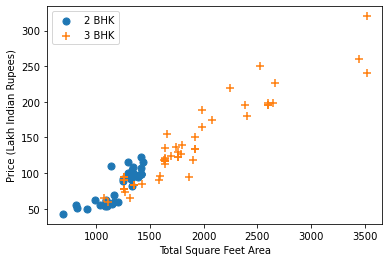

In [34]:
#  Now lets check if the prize of 2bhk is grater than 3bhak so its outlier lets check it is there 
def plot_scatter_bhk_price(df , location):
    df_2bhk = df[(df['size'] == 2) & (df['location'] == location)]
    df_3bhk = df[(df['size'] == 3) & (df['location'] == location)]
    plt.scatter(df_2bhk.total_sqft , df_2bhk.price , label = '2 BHK' , s =50)
    plt.scatter(df_3bhk.total_sqft , df_3bhk.price , label = '3 BHK' , marker = '+' , s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    # plt.title(location)
    plt.legend()

plot_scatter_bhk_price(new_df , 'Hebbal')

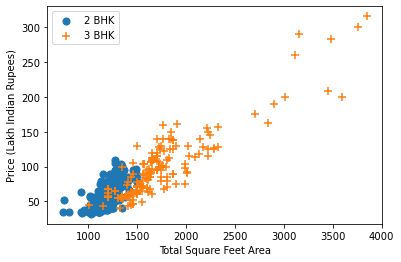

In [35]:
plot_scatter_bhk_price(new_df , 'Whitefield')

### We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk,
##### ex = {
 #####   '1' : {
 #####     'mean': 4000,
#####        'std: 2000,
#####        'count': 34
 #####   },
 #####   '2' : {
 #####       'mean': 4300,
 #####       'std: 2300,
  #####      'count': 22
 #####   },    
##### }
### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [36]:
# def remove_bhk_outliers(df):
#     exclude_indices = np.array([])
#     for location , location_df in new_df.groupby('location'):
#         bhk_stat_dict = {}
#         for bhk , bhk_df in new_df.groupby('size'):
#             m = np.mean(new_df.price_per_sqft)
#             st = np.std(new_df.price_per_sqft)
#             count = bhk_df.shape[0]
#             bhk_stat_dict[bhk] = {
#                 'Mean' : m ,
#                 'Std' : st ,
#                 'count' : count
#                 }
#         for bhk , bhk_df in location_df.groupby('size'):
#             stats = bhk_stat_dict.get(bhk-1)
#             if stats and stats['count'] > 5 :
#                   exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['Mean'])].index.values)
#     return df.drop(exclude_indices,axis='index')

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')



In [37]:
new_df.shape

(10289, 7)

In [38]:
new_df_after_remove_bhk_outlier = remove_bhk_outliers(new_df)
new_df_after_remove_bhk_outlier.shape

(7365, 7)

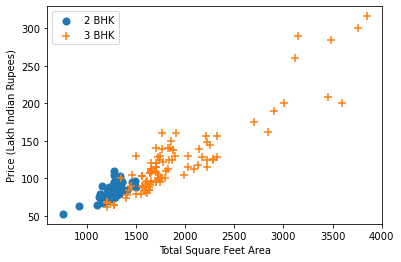

In [39]:
#  After remove out liers
plot_scatter_bhk_price(new_df_after_remove_bhk_outlier , 'Whitefield')

Text(0, 0.5, 'Count')

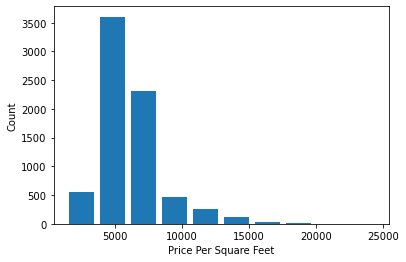

In [40]:
plt.hist(new_df_after_remove_bhk_outlier.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

#### Outlier Removal Using Bathrooms Feature


Text(0, 0.5, 'Count')

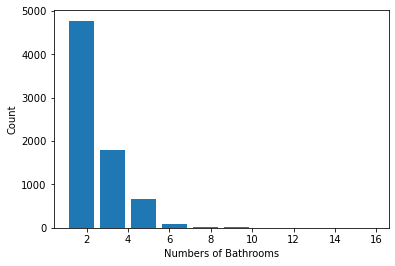

In [41]:
plt.hist(new_df_after_remove_bhk_outlier.bath,rwidth=0.8)
plt.xlabel("Numbers of Bathrooms")
plt.ylabel("Count")

In [42]:
new_df_after_remove_bhk_outlier[new_df_after_remove_bhk_outlier['bath'] > 10]

,location,size,total_sqft,bath,balcony,price,price_per_sqft
5300,Neeladri Nagar,10.0,4000.0,12.0,2.0,160.0,4000.000000
8525,other,10.0,12000.0,12.0,2.0,525.0,4375.000000
8614,other,16.0,10000.0,16.0,2.0,550.0,5500.000000
9353,other,11.0,6000.0,12.0,2.0,150.0,2500.000000
9685,other,13.0,5425.0,13.0,0.0,275.0,5069.124424


### It is unusual to have 2 more bathrooms than number of bedrooms in a home



In [43]:
new_df_after_remove_bhk_outlier[new_df_after_remove_bhk_outlier['bath'] > new_df_after_remove_bhk_outlier['size']+2 ]

,location,size,total_sqft,bath,balcony,price,price_per_sqft
1645,Chikkabanavar,4.0,2460.0,7.0,2.0,80.0,3252.032520
5261,Nagasandra,4.0,7000.0,8.0,2.0,450.0,6428.571429
6739,Thanisandra,3.0,1806.0,6.0,2.0,116.0,6423.034330
8449,other,6.0,11338.0,9.0,1.0,1000.0,8819.897689


### if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed



In [44]:
bath_clean_data = new_df_after_remove_bhk_outlier[new_df_after_remove_bhk_outlier['bath'] < new_df_after_remove_bhk_outlier['size']+2 ]
bath_clean_data.shape

(7280, 7)

In [45]:
bath_clean_data.sample(7)


,location,size,total_sqft,bath,balcony,price,price_per_sqft
6258,Sarjapur Road,3.0,1550.0,2.0,2.0,98.0,6322.580645
3094,Hennur Road,2.0,1232.0,2.0,1.0,74.0,6006.493506
383,Ambedkar Nagar,3.0,1936.0,4.0,2.0,126.0,6508.264463
2696,Haralur Road,2.0,1243.0,2.0,1.0,46.0,3700.724055
335,Akshaya Nagar,3.0,1690.0,3.0,2.0,85.0,5029.585799
2648,Haralur Road,2.0,1464.0,2.0,2.0,56.0,3825.136612
8613,other,1.0,596.0,1.0,1.0,42.0,7046.979866


In [46]:
#  Now we can drop unnessary columns from Data set after clean all outliers 
home_clean_Data = bath_clean_data.drop('price_per_sqft' , axis = 'columns')
home_clean_Data.sample(10)

,location,size,total_sqft,bath,balcony,price
9040,other,7.0,2800.00,7.0,1.0,250.0
2337,Electronics City Phase 1,2.0,1145.00,2.0,1.0,54.0
9738,other,2.0,1000.00,2.0,0.0,66.0
1346,Bommasandra,2.0,800.00,1.0,1.0,32.0
6912,Uttarahalli,3.0,1627.86,3.0,2.0,88.0
4817,Lakshminarayana Pura,2.0,1175.00,2.0,2.0,75.0
3748,KR Puram,2.0,1200.00,2.0,0.0,71.0
4500,Kodichikkanahalli,2.0,1299.00,2.0,3.0,58.0
9926,other,2.0,1279.00,2.0,3.0,100.0
1808,Dodda Nekkundi,2.0,1264.00,2.0,2.0,52.0


## doing One Hot encoding 


In [47]:
dummies = pd.get_dummies(home_clean_Data['location'])
# dummies.drop('other',axis='columns')
dummies.shape

(7280, 242)

In [48]:
home_clean_Data = pd.concat([home_clean_Data , dummies.drop('other' , axis = 'columns')] , axis = 'columns' )
home_clean_Data.head()

,location,size,total_sqft,bath,balcony,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,2.0,1250.0,2.0,2.0,40.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,2.0,1200.0,2.0,2.0,83.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,2.0,1170.0,2.0,2.0,40.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,3.0,1425.0,2.0,2.0,65.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,2.0,947.0,2.0,2.0,43.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df_final = home_clean_Data.drop('location'  ,axis = 'columns')
df_final.shape

(7280, 246)

### Build Model 

In [50]:
x = df_final.drop('price' , axis = 'columns')
x.sample(3)

,size,total_sqft,bath,balcony,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
9324,3.0,2100.0,4.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6918,3.0,1320.0,2.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9550,2.0,1280.0,2.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
y = df_final.price
y.head(3)

1    40.0
2    83.0
3    40.0
Name: price, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x , y , test_size = 0.2 , random_state = 10)

In [53]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(xtrain ,ytrain)

LinearRegression()

In [54]:
lin_model.score(xtest , ytest)

0.869140308044371

#### Using K-Fold validations 

In [55]:
from sklearn.model_selection import ShuffleSplit , cross_val_score
cv = ShuffleSplit(n_splits = 5 , test_size = 0.2 , random_state = 10) 
cross_val_score(LinearRegression() , x ,y , cv = cv)



array([0.86914031, 0.82263761, 0.81480465, 0.84937746, 0.83470402])

## Find the best Algo using GridSearchCV

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC

def find_best_model_using_gridSearchCv(x , y):
    algo = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True , False]
            }
            
        } ,
        
        'lasso' : {
            'model' : Lasso() , 
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random' , 'cyclic']
            }
        } ,
        
        'decision_tree' : {
            'model' : DecisionTreeRegressor() ,
            'params' : {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }

        } , 
        
#         'SVM' : {
#             'model' : SVC() , 
#             'params' : {
#                 'kernel':['linear'],
#                 'random_state' : [0]
#             }
#         }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5 , test_size = 0.2 , random_state = 0)
    for algo_name , config in algo.items():
        gs = GridSearchCV(config['model'] , config['params'] , cv = cv , return_train_score =  False)
        gs.fit(x,y)
        scores.append({
            'model' : algo_name , 
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores , columns = ['model' , 'best_score' , 'best_params'])
find_best_model_using_gridSearchCv(x ,y )

,model,best_score,best_params
0,linear_regression,0.822465,{'normalize': False}
1,lasso,0.678068,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.711906,"{'criterion': 'mse', 'splitter': 'random'}"


### Pridict And Test Model 

In [116]:
def pridict_price(location , sqft , bath , balcony , bhk):
    index_location = np.where(x.columns == location)[0][0]
    X = np.zeros(len(x.columns))
    if index_location >= 0 :
        X[index_location] = 1
    X[0] = bhk
    X[1] = sqft
    X[2] = bath
    X[3] = balcony
    print(X[0] , X[1] , X[2] ,X[3] , index_location)
    return lin_model.predict([X])[0]

# def predict_price(location,sqft,bath,bhk):    
#     loc_index = np.where(x.columns==location)[0][0]

#     X = np.zeros(len(x.columns))
#     X[0] = sqft
#     X[1] = bath
#     X[2] = bhk
#     if loc_index >= 0:
#         x[loc_index] = 1

#     return lin_model.predict([x])[0]

In [138]:
pridict_price('1st Phase JP Nagar',1000, 2,1,2)
#lin_model.predict([['1st Phase JP Nagar',1000, 2, 1 ,2]])


2.0 1000.0 2.0 1.0 6


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 245 is different from 250)